In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
def read_file(file_path):
    model = file_path.split("/")[0]
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            
            #epoch = int(parts[1])
            mean = float(parts[3])
            #best = float(parts[5])
            #worst = float(parts[7])
            #std = float(parts[9])
            
            data.append([mean])

    df = pd.DataFrame(data, columns=[f'{model}'])

    return df

def read_eval(file_path):
    model = file_path.split("/")[0]
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            
            mean = float(parts[2])
            #best = float(parts[4])
            #worst = float(parts[6])
            
            data.append([mean])

    df = pd.DataFrame(data, columns=[f'{model}'])

    return df

def read_folder(folder_path):
    df1 = read_file(f"{folder_path}/train_log_1_.txt")
    #df2 = read_file(f"{folder_path}/train_log_2_.txt")
    #df3 = read_file(f"{folder_path}/train_log_3_.txt")
    eval_df1 = read_eval(f"{folder_path}/eval_log_1_.txt")
    #eval_df2 = read_eval(f"{folder_path}/eval_log_2_.txt")
    #eval_df3 = read_eval(f"{folder_path}/eval_log_3_.txt")
    return df1, eval_df1

def plot_mean(p1,p2,p3):
    d11, _ = read_folder(p1)
    d21, _ = read_folder(p2)
    d31, _ = read_folder(p3)
    res = pd.concat([d11,d21,d31],axis=1)
    ax = sns.lineplot(data=res)
    ax.set(xlabel='Epoch', ylabel='Mean reward',title='Bipedal Walker with OpenES')
    # Add legend on the right side
    ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
    plt.show()
    return res

def plot_mean_eval(p1,p2,p3):
    _,d11 = read_folder(p1)
    _,d21 = read_folder(p2)
    _,d31 = read_folder(p3)
    res = pd.concat([d11,d21,d31],axis=1)
    sns.lineplot(res)
    return res


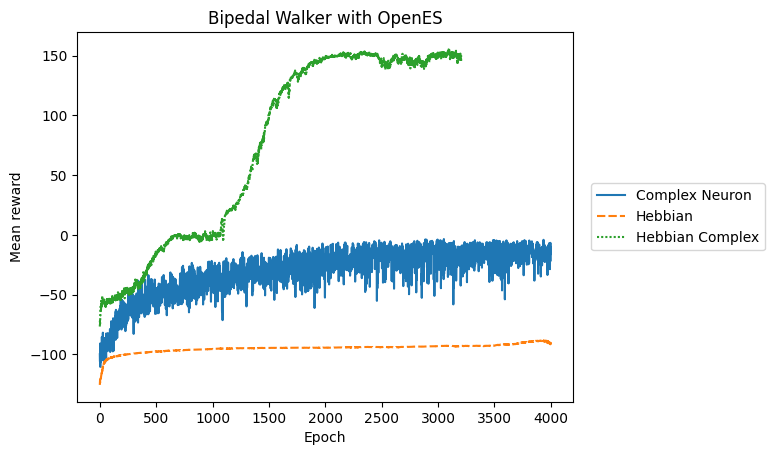

In [32]:
res = plot_mean("ComplexNeuron","Hebbian","HebbianComplex")

In [4]:
res

,complex_neuron - mean,vectorized_hebb_original - mean,vectorized_hebb_complex - mean
0,-99.912613,-125.574771,-76.737161
1,-106.009075,-122.742336,-71.991174
2,-105.776253,-121.231930,-74.561621
3,-90.887357,-123.473229,-73.933554
4,-110.494277,-122.325236,-67.462541
...,...,...,...
3996,-15.332622,-91.553174,NaN
3997,-6.722826,-90.632609,NaN
3998,-16.348529,-91.381562,NaN
3999,-10.217879,-90.335691,NaN


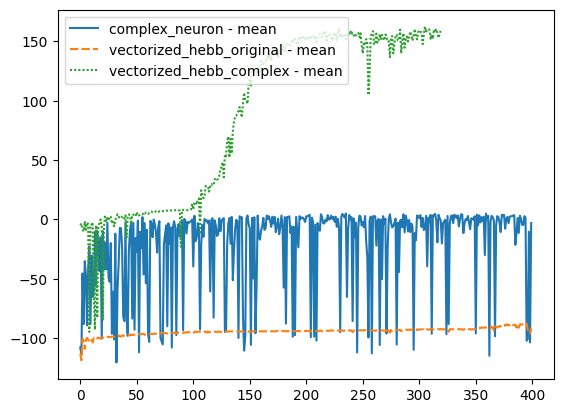

In [5]:
res2 = plot_mean_eval("complex_neuron","vectorized_hebb_original","vectorized_hebb_complex")

In [6]:
res2

,complex_neuron - mean,vectorized_hebb_original - mean,vectorized_hebb_complex - mean
0,-107.906979,-113.179717,-4.949452
1,-114.031746,-118.706918,-3.457244
2,-45.540811,-100.680766,-8.555686
3,-88.210900,-101.617319,-10.200916
4,-35.247385,-109.173379,-1.571500
...,...,...,...
395,-102.271106,-87.825050,NaN
396,-100.932852,-92.885418,NaN
397,-10.347444,-95.112129,NaN
398,-103.691490,-96.211689,NaN
